In [227]:
import pandas as pd 
df = pd.read_csv('C:/Users/smail/Downloads/iot-tweets-2009-2016-complet/iot-tweets-2009-2016-complet.tsv', sep='\t')
df = df.drop(columns=['URLs','User_ID','Gender','TopicID'], axis=1)
df.head()

,TweetID,Sentiment,Country,Text
0,1093771552,neutral,us,"'First sign of twitter as transport for ""inter..."
1,1099404026,neutral,ca,"""The Internet of Things. L'internet des objets..."
2,1099881858,neutral,gb,'programming mirroir and nabaztag... Internet ...
3,1104012014,neutral,be,'aha mycrocosm integration & internet of thing...
4,1104556075,neutral,it,'The concept is basically The Internet of Things'


In [229]:
df['Sentiment'].value_counts()

neutral     6410274
positive     172558
negative     123116
Name: Sentiment, dtype: int64

In [230]:
#delete nan values
df = df[pd.notnull(df['Text'])]
df['Sentiment'].value_counts()

neutral     6031103
positive     164085
negative     114777
Name: Sentiment, dtype: int64

In [231]:
df['pre_clean_len'] = [len(t) for t in df['Text']]
#df['pre_clean_len'] 

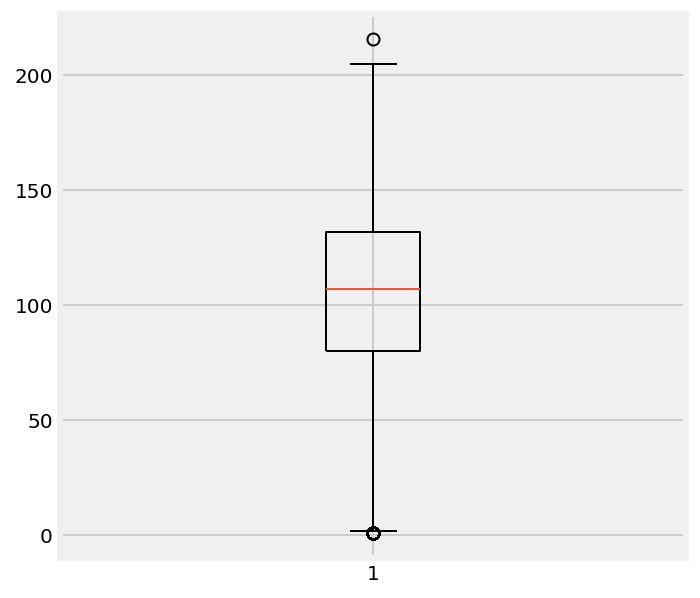

In [232]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df['pre_clean_len'])
plt.show()

In [233]:
df[df['pre_clean_len'] > 140]['Sentiment'].head(10).value_counts()

neutral    10
Name: Sentiment, dtype: int64

In [242]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
ps=PorterStemmer()


tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+' #mention
pat2 = r'https?://[^ ]+' #urls
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+' #www urls
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not","I'm":"I am","you're":"you are"} #negation words
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
   # lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], stripped)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()
print(len(df))
testing = df['Text'][:1000]
test_result = []
for t in testing:
    test_result.append(
        ps.stem(
        tweet_cleaner(t)))
test_result

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\smail\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


6309965


['first sign of twitter as transport for internet of things at',
 'the internet of things l internet des objet',
 'programming mirroir and nabaztag internet of th',
 'aha mycrocosm integration internet of things working via twitter api nic',
 'the concept is basically the internet of th',
 'as i see the evolution internet of websites internet of people internet of th',
 'cellphones are barcode readers here comes the internet of th',
 'can you point me to the interview we did at vwc in la in sept about the internet of things for',
 'the internet of th',
 'the internet of things will only truly happen when a proper p p near field communication and relay industrial protocol comes up',
 'things tags the internet of th',
 'why is the internet of things different from the intranet of things we call real lif',
 'just curious what do you think the internet of things adds to your lif',
 'the internet of things is a new way of getting in touch with the world then',
 'reading up on the internet o

In [243]:
nums = [0,400000,800000,1200000,1800000,2200000,2800000,3200000,3800000,4200000,4800000,5200000,5800000,6309964]
#print "Cleaning and parsing the tweets...\n"
clean_tweet_texts = []
#for j in range(13):
  #  print(nums[j],'---',nums[j+1])
for i in range(90000):
    if((i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[j] ))
    if(i in df['Text'].keys()):
        clean_tweet_texts.append(tweet_cleaner(df['Text'][i]))

Tweets 10000 of 800000 has been processed
Tweets 20000 of 800000 has been processed
Tweets 30000 of 800000 has been processed
Tweets 40000 of 800000 has been processed
Tweets 50000 of 800000 has been processed
Tweets 60000 of 800000 has been processed
Tweets 70000 of 800000 has been processed
Tweets 80000 of 800000 has been processed
Tweets 90000 of 800000 has been processed


In [244]:
clean_tweet_texts

['First sign of twitter as transport for internet of things at',
 'The Internet of Things L internet des objets',
 'programming mirroir and nabaztag Internet of things',
 'aha mycrocosm integration internet of things working via Twitter API nice',
 'The concept is basically The Internet of Things',
 'As I see the evolution Internet of Websites Internet of People Internet of Things',
 'Cellphones are barcode readers Here comes the internet of Things',
 'can you point me to the interview we did at VWC in LA in Sept about the Internet Of Things for',
 'The internet of things',
 'the internet of things will only truly happen when a proper p p near field communication and relay industrial protocol comes up',
 'Things tags The internet of things',
 'why is the internet of things different from the intranet of things we call real life',
 'Just curious what do you think the internet of things adds to your life',
 'the internet of things is a new way of getting in touch with the world then',
 '

In [245]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['sentiment'] = df['Sentiment']
clean_df['TweetID'] = df['TweetID']
clean_df.head()

,text,sentiment,TweetID
0,First sign of twitter as transport for interne...,neutral,1.093772e+09
1,The Internet of Things L internet des objets,neutral,1.099404e+09
2,programming mirroir and nabaztag Internet of t...,neutral,1.099882e+09
3,aha mycrocosm integration internet of things w...,neutral,1.104012e+09
4,The concept is basically The Internet of Things,neutral,1.104556e+09


In [246]:
clean_df.to_csv('clean_tweet1.csv',encoding='utf-8')
csv = 'clean_tweet1.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,sentiment,TweetID
0,First sign of twitter as transport for interne...,neutral,1.093772e+09
1,The Internet of Things L internet des objets,neutral,1.099404e+09
2,programming mirroir and nabaztag Internet of t...,neutral,1.099882e+09
3,aha mycrocosm integration internet of things w...,neutral,1.104012e+09
4,The concept is basically The Internet of Things,neutral,1.104556e+09


In [247]:
my_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87509 entries, 0 to 87508
Data columns (total 3 columns):
text         87471 non-null object
sentiment    85097 non-null object
TweetID      85097 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [248]:
my_df[my_df.isnull().any(axis=1)].head()
#np.sum(my_df.isnull().any(axis=1))


,text,sentiment,TweetID
108,RT Companies Building the Internet of Things,NaN,NaN
188,Companies Building the Internet of Things,NaN,NaN
192,Companies Building the Internet of Things feedly,NaN,NaN
212,RT Sarah Perez rules for writing this about th...,NaN,NaN
240,companies working to build the Internet of thi...,NaN,NaN


NameError: name 'my_df' is not defined